## 数据生成 data generation

模拟生成直线附近的点

Simulate generating points near a straight line

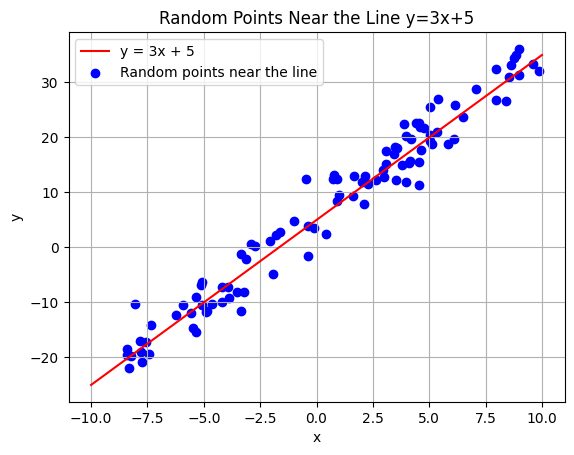

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 生成随机的x值 (Generate random x values)
x_values = np.random.uniform(-10, 10, 100)

# 计算直线上的y值 y = 3x + 5 (Calculate y values on the line y=3x+5)
y_values = 3 * x_values + 5

# 添加随机噪声，使点分布在直线附近 (Add random noise to make the points distributed around the line)
noise = np.random.normal(0, 3, 100)  # 均值为0，标准差为3的噪声 (Noise with mean 0 and standard deviation 3)
y_random = y_values + noise

# 绘制直线 y = 3x + 5 (Plot the line y = 3x + 5)
x_line = np.linspace(-10, 10, 100)
y_line = 3 * x_line + 5
plt.plot(x_line, y_line, color='red', label='y = 3x + 5')

# 绘制随机点 (Plot the random points)
plt.scatter(x_values, y_random, color='blue', label='Random points near the line')

# 添加图例和标签 (Add legend and labels)
plt.legend()
plt.title('Random Points Near the Line y=3x+5')  # 图形标题 (Plot title)
plt.xlabel('x')  # x轴标签 (x-axis label)
plt.ylabel('y')  # y轴标签 (y-axis label)

# 显示图形 (Show the plot)
plt.grid(True)
plt.show()

## 随机森林回归 Random Forest Regressor

使用随机森林回归预测数据

Use Random Forest Regressor to predict data

In [3]:
from sklearn.model_selection import train_test_split

# 将x_values转换为二维数组 (Reshape x_values to a 2D array)
X = x_values.reshape(-1, 1)
y = y_random

# 分割数据为训练集和测试集 (Split the data into training and testing sets)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 初始化随机森林回归器 (Initialize the RandomForestRegressor)
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# 训练模型 (Train the model)
rf_regressor.fit(X_train, y_train)

# 预测测试集 (Predict on the test set)
y_pred = rf_regressor.predict(X_test)

# 计算均方误差和R^2评分 (Calculate the Mean Squared Error and R^2 score)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 13.197978427970313
R^2 Score: 0.9383198594701596


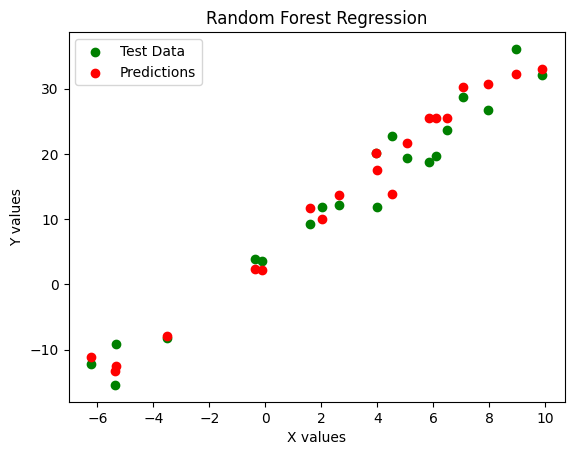

In [7]:
import matplotlib.pyplot as plt

# 绘制测试数据 (Plot test data)
plt.scatter(X_test, y_test, color="green", label="Test Data")
# 绘制模型的预测结果 (Plot model predictions)
plt.scatter(X_test, y_pred, color="red", label="Predictions")

# 标题和标签 (Add title and labels)
plt.title("Random Forest Regression")
plt.xlabel("X values")
plt.ylabel("Y values")

# 显示图例 (Show legend)
plt.legend()

# 显示图形 (Show plot)
plt.show()

# 检查节点 check nodes

检查随机森林节点

check nodes of random forrest

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz


# 5. 抽取随机森林中的几棵树 (Extract a few trees from the forest)
# 抽取第1棵和第2棵树 (Extract the 1st and 2nd tree)
tree_1 = rf_regressor.estimators_[0]
tree_2 = rf_regressor.estimators_[1]

# 可视化第1棵树 (Visualize the first tree using graphviz)
dot_data_1 = export_graphviz(tree_1, out_file=None, 
                             feature_names=["Scaled X"],  
                             class_names=["Class 0", "Class 1"],
                             filled=True, rounded=True,  
                             special_characters=True) 
graph_1 = graphviz.Source(dot_data_1)  
graph_1.render("random_forest_tree_1", format="png")  # 导出为PNG文件 (Export to PNG)

# 可视化第2棵树 (Visualize the second tree using graphviz)
dot_data_2 = export_graphviz(tree_2, out_file=None, 
                             feature_names=["Scaled X"],  
                             class_names=["Class 0", "Class 1"],
                             filled=True, rounded=True,  
                             special_characters=True) 
graph_2 = graphviz.Source(dot_data_2)  
graph_2.render("random_forest_tree_2", format="png")  # 导出为PNG文件 (Export to PNG)

'random_forest_tree_2.png'

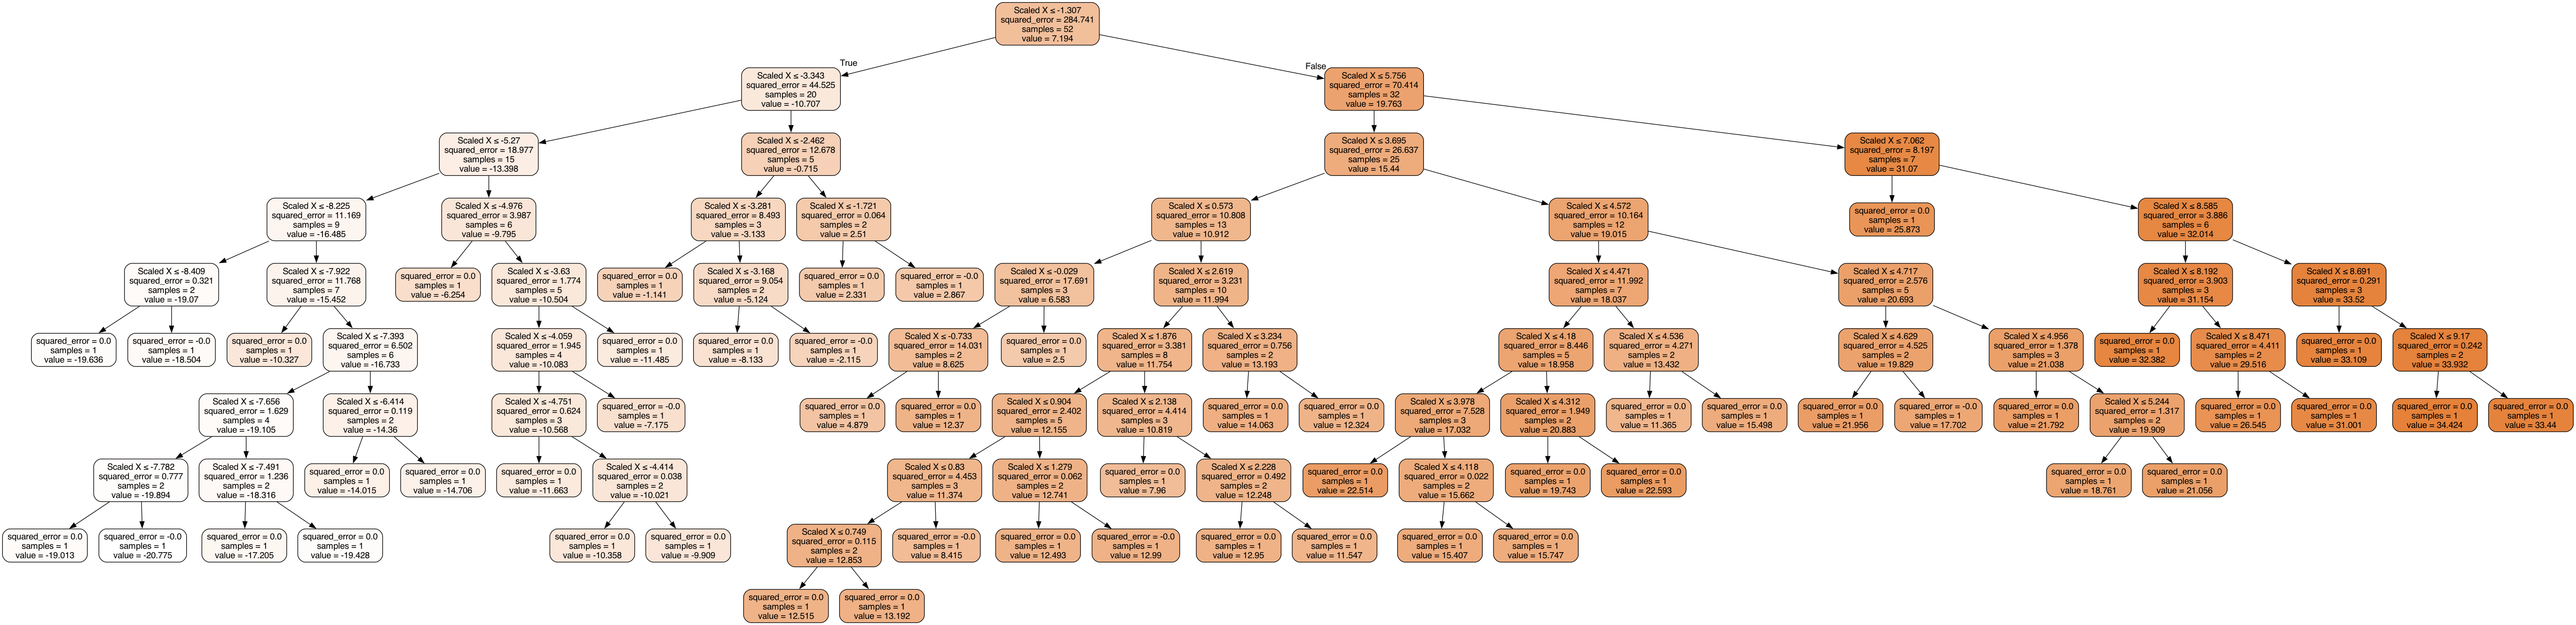